In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
#Config information and query URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [4]:
#lists to hold response info
temp = [] #weather_response['main']['temp']
latitude = [] #weather_response['coord']['lat']
humidity = [] #weather_response['main']['humidity']
cloudiness = [] #weather_response['clouds']['all']
wind_speed = [] #weather_response['wind']['speed']
city_list = [] #weather_response['name']

In [5]:
#loop and retrieve data for cities
for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing City: {city}")
        temp.append(weather_response['main']['temp'])
        latitude.append(weather_response['coord']['lat'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        city_list.append(weather_response['name'])
    except KeyError:
        print: "City not found.. skipping" 

Processing City: jiaojiang
Processing City: ancud
Processing City: bluff
Processing City: illoqqortoormiut
Processing City: marquette
Processing City: hasaki
Processing City: mataura
Processing City: arraial do cabo
Processing City: dunedin
Processing City: laishevo
Processing City: vestmanna
Processing City: faanui
Processing City: clyde river
Processing City: alofi
Processing City: airai
Processing City: norman wells
Processing City: grand river south east
Processing City: punta arenas
Processing City: nara
Processing City: lompoc
Processing City: mana
Processing City: thompson
Processing City: tacoronte
Processing City: gravdal
Processing City: bethel
Processing City: luxor
Processing City: karratha
Processing City: labuhan
Processing City: esperance
Processing City: nikolayevsk-na-amure
Processing City: ribeira grande
Processing City: bluefields
Processing City: luderitz
Processing City: georgetown
Processing City: tuatapere
Processing City: port alfred
Processing City: saint-pierr

Processing City: tiznit
Processing City: antofagasta
Processing City: minsk
Processing City: kuala terengganu
Processing City: saint-francois
Processing City: chalchuapa
Processing City: dukat
Processing City: dongsheng
Processing City: buraydah
Processing City: ayorou
Processing City: caranavi
Processing City: kisumu
Processing City: ostrovnoy
Processing City: syedove
Processing City: berlevag
Processing City: marawi
Processing City: astaneh-ye ashrafiyeh
Processing City: kirakira
Processing City: vila franca do campo
Processing City: la paz
Processing City: salalah
Processing City: longyearbyen
Processing City: timra
Processing City: semey
Processing City: baiyin
Processing City: port-gentil
Processing City: tsihombe
Processing City: komsomolskiy
Processing City: padang
Processing City: sakakah
Processing City: krasnovishersk
Processing City: chumikan
Processing City: pangnirtung
Processing City: jalu
Processing City: fortuna
Processing City: bathsheba
Processing City: kutum
Processi

Processing City: disna
Processing City: bandarbeyla
Processing City: port hawkesbury


In [6]:
weather_df = pd.DataFrame({
    "City": city_list,
    "Temperature(F)": temp,
    "Latitude": latitude,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
})
weather_df

,City,Temperature(F),Latitude,Humidity,Cloudiness,Wind Speed
0,Jiaojiang,77.05,28.6803,92,5,1.36
1,Ancud,46.22,-41.8697,84,97,4.03
2,Bluff,44.80,-46.6000,75,52,34.34
3,Marquette,76.66,46.5333,52,4,11.36
4,Hasaki,81.00,35.7333,92,81,8.61
...,...,...,...,...,...,...
570,Oberwart,69.62,47.2897,72,2,4.90
571,Carroll,86.45,39.5501,50,32,7.00
572,Disna,56.46,55.5680,89,2,2.24
573,Bandarbeyla,75.61,9.4942,80,38,29.95


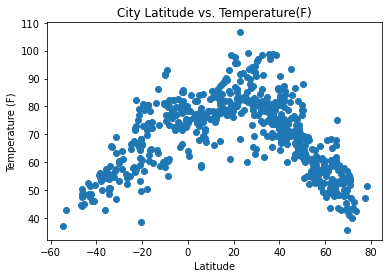

Code is analyzing the relationship between latitude and temperature. As latitude gets closer to 0, temperature increases.


In [7]:
#Latitude vs Temperature
plt.scatter(weather_df['Latitude'],weather_df['Temperature(F)'])
plt.title("City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing the relationship between latitude and temperature. As latitude gets closer to 0, temperature increases.")

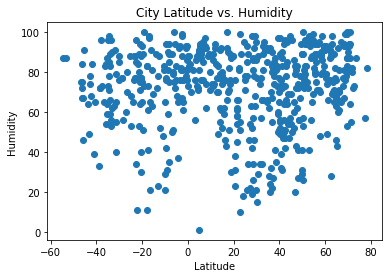

Code is analyzing the relationship between latitude and humidity. As latitude gets closer to 0, humidity tends to be at least above 40%, however latitudes higher and lower than 0 also have humidity above that value.


In [8]:
#Latitude vs Humidity
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing the relationship between latitude and humidity. As latitude gets closer to 0, humidity tends to be at least above 40%, however latitudes higher and lower than 0 also have humidity above that value.")

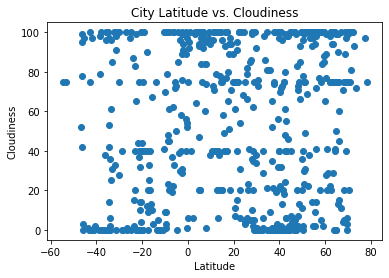

Code is analyzing latitude vs cloudiness, there is not a significant relationship between the two. 


In [9]:
#Latitude vs Cloudiness
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing latitude vs cloudiness, there is not a significant relationship between the two. ")

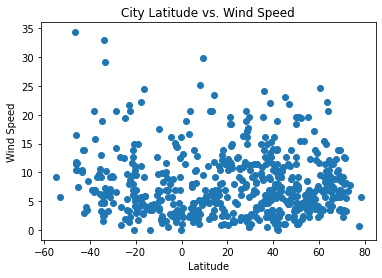

Code is analyzing latitude vs wind speed, there is not a significant relationship between the two. 


In [10]:
#Latitude vs Windspeed
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.show()
print("Code is analyzing latitude vs wind speed, there is not a significant relationship between the two. ")

In [11]:
#Create northern and southern hemisphere dataframes
north_df = weather_df.loc[(weather_df['Latitude'] > 0),:]
south_df = weather_df.loc[(weather_df['Latitude'] < 0),:]

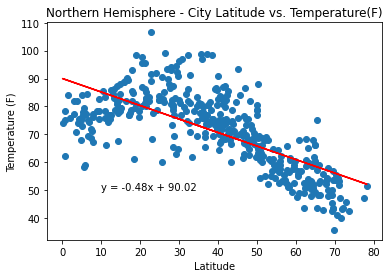

The r-value is: -0.7061665990895464
As city latitude gets further from 0, temperature decreases.


In [32]:
#Northern Hemisphere Latitude vs Temperature
plt.scatter(north_df['Latitude'],north_df['Temperature(F)'])
plt.title("Northern Hemisphere - City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Temperature(F)'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (10,50))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, temperature decreases.")

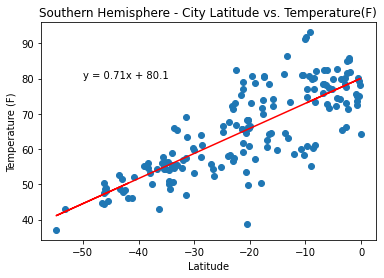

The r-value is: 0.7971359664824046
As city latitude gets closer to 0, temperature increases.


In [33]:
#Southern Hemisphere Latitude vs Temperature
plt.scatter(south_df['Latitude'],south_df['Temperature(F)'])
plt.title("Southern Hemisphere - City Latitude vs. Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Temperature(F)'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,80))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer to 0, temperature increases.")

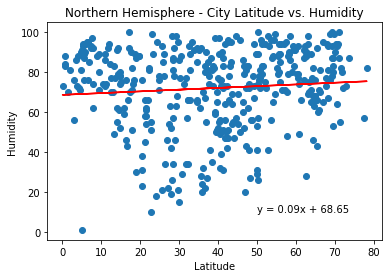

The r-value is: 0.08569160442235187
As city latitude gets further from 0, humidity increases.


In [37]:
#Northern Hemisphere Latitude vs Humidity
plt.scatter(north_df['Latitude'],north_df['Humidity'])
plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Humidity'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (50,10))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, humidity increases.")

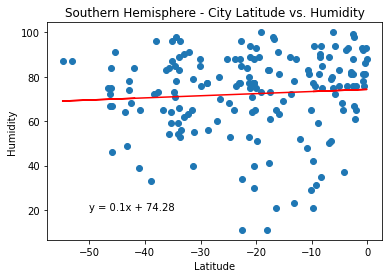

The r-value is: 0.07046773047033013
As city latitude gets closer 0, humidity increases.


In [46]:
#Southern Hemisphere Latitude vs Humidity
plt.scatter(south_df['Latitude'],south_df['Humidity'])
plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Humidity'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-50,20))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer 0, humidity increases.")

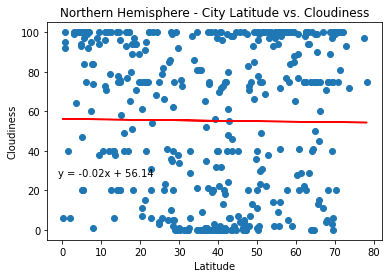

The r-value is: -0.01182230918748655
As city latitude gets further from 0, cloudiness decreases.


In [53]:
#Northern Hemisphere Latitude vs Cloudiness
plt.scatter(north_df['Latitude'],north_df['Cloudiness'])
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Cloudiness'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-1,27))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, cloudiness decreases.")

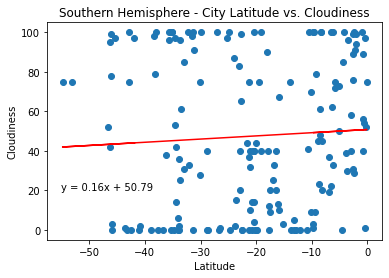

The r-value is: 0.058508442904392714
As city latitude gets closer to 0, cloudiness increases.


In [57]:
#Southern Hemisphere Latitude vs Cloudiness
plt.scatter(south_df['Latitude'],south_df['Cloudiness'])
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Cloudiness'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-55,20))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer to 0, cloudiness increases.")

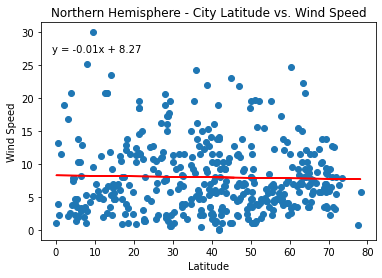

The r-value is: -0.027593914294350597
As city latitude gets further from 0, wind speed decreases.


In [60]:
#Northern Hemisphere Latitude vs Cloudiness
plt.scatter(north_df['Latitude'],north_df['Wind Speed'])
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Latitude'],north_df['Wind Speed'])
regress_values = north_df['Latitude'] * slope + intercept
plt.plot(north_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-1,27))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets further from 0, wind speed decreases.")

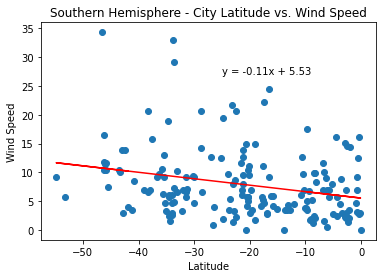

The r-value is: -0.2604237197070611
As city latitude gets closer to 0, wind speed decreases.


In [63]:
#Southern Hemisphere Latitude vs Cloudiness
plt.scatter(south_df['Latitude'],south_df['Wind Speed'])
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Latitude'],south_df['Wind Speed'])
regress_values = south_df['Latitude'] * slope + intercept
plt.plot(south_df['Latitude'], regress_values, "r-")
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (-25,27))
plt.show()
print(f"The r-value is: {rvalue}")
print("As city latitude gets closer to 0, wind speed decreases.")